# Description for Naive Bayes's Feature Importance

The `GaussianNB` does not offer an intrinsic method to evaluate feature importances. Naïve Bayes methods work by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability. Thus, there are no coefficients computed or associated with the features you used to train the model (compare with its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

That being said, there are methods that you can apply post-hoc to analyze the model after it has been trained. One of these methods is the **Permutation Importance** and it, conveniently, has also been implemented in `scikit-learn`. With the code you provided as a base, you would use [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) the following way:

👉 If you want to know more abou permutation importance you can visit [user guide](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-feature-importance)

# Verileri İçeri Aktarma

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("../Database/BaseDataframe.csv")
df.head(3)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


# Ön işleme

Hedef değişkeni label encode ile encode edelim ki numeric bir biçimde kullanalım.


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])

In [3]:
le.inverse_transform([0, 1, 2])

array(['High', 'Low', 'Medium'], dtype=object)

Modellerimizi test edebilmek için train-test split edelim.

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(["Level", 'index', 'Patient Id'], axis=1)
y = df[['Level']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Verileri standartlaştırıp numpy array biçimine çevirelim ki scikit-learn kütüphanesinden daha fazla verim elde edelim.

In [11]:
display(X_train[:1]);display(y_train[:5])

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
405,48,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3


array([2, 2, 2, 2, 1])

# Modelleme

Bu kısımda seçilen model olan Gaussian Naive Bayes ile feature importance işlemi yapacağız.

In [12]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

imps = permutation_importance(gaussian_nb, X_test, y_test)
print(imps.importances_mean)

[ 0.    -0.006 -0.007  0.003 -0.018 -0.017 -0.007 -0.009  0.014  0.013
 -0.01  -0.01  -0.013  0.     0.056  0.     0.009  0.029  0.001  0.03
  0.012 -0.007  0.027]


In [13]:
importance_mean = imps['importances_mean']
col_names = X.columns

importance_df = pd.DataFrame({'feature': col_names, 'importance': importance_mean}).sort_values('importance', ascending=False)
importance_df

,feature,importance
14,Fatigue,0.056
19,Clubbing of Finger Nails,0.030
17,Wheezing,0.029
22,Snoring,0.027
8,Balanced Diet,0.014
9,Obesity,0.013
20,Frequent Cold,0.012
16,Shortness of Breath,0.009
3,Alcohol use,0.003
18,Swallowing Difficulty,0.001


<Axes: title={'center': 'Feature Importance'}, xlabel='feature'>

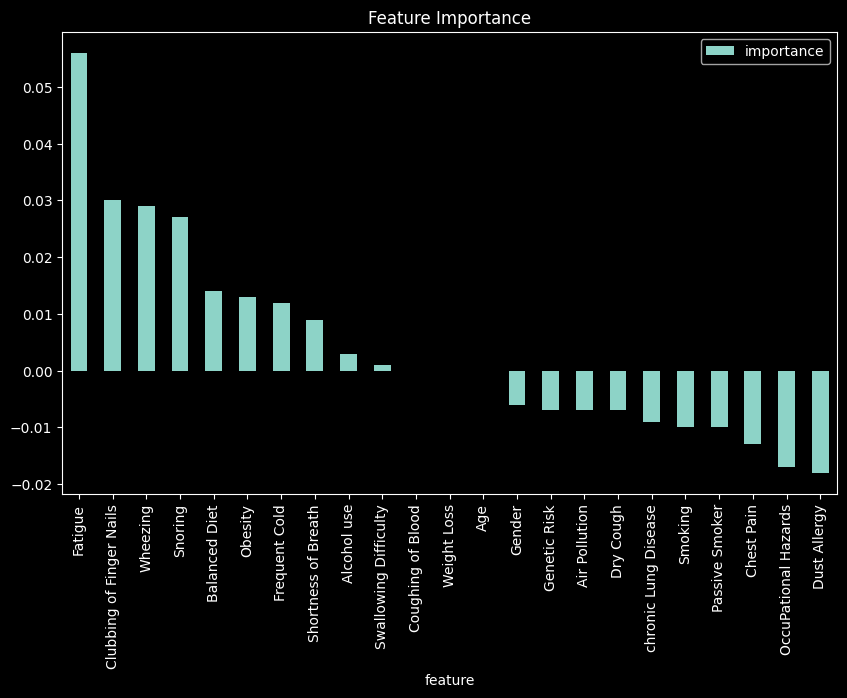

In [14]:
importance_df.plot.bar(x='feature', y='importance', figsize=(10, 6), title='Feature Importance')

# Export Model and Encoder

In [16]:
import pickle

# export the model to a file
with open('../Model/theModel.pkl', 'wb') as file:
    pickle.dump(gaussian_nb, file)
    
# export the label encoder to a file
with open('../Encoders/encoder.pkl', 'wb') as file:
    pickle.dump(le, file)